In [2]:
print('Hello World !!')

Hello World !!


In [3]:
import pandas as pd 
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
df_org = pd.read_csv('financial_risk_assessment.csv')
df_org.head(20)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.00,15613.00,Business,Unemployed,5,Fair,0.30,NaN,4.00,Brianland,TN,Iceland,3.00,1,Medium
6,31,Non-binary,Master's,Widowed,45280.00,672.00,6553.00,Personal,Self-employed,1,Good,0.38,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.00,1,Low
7,18,Male,Bachelor's,Widowed,93678.00,NaN,NaN,Business,Unemployed,10,Poor,0.40,246597.00,1.00,Melissahaven,MA,Honduras,1.00,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.00,710.00,NaN,Auto,Unemployed,4,Fair,0.34,227599.00,0.00,North Beverly,DC,Pitcairn Islands,4.00,2,Low
9,55,Male,Bachelor's,Married,32190.00,600.00,29918.00,Personal,Self-employed,5,Excellent,0.48,130507.00,4.00,Davidstad,VT,Thailand,NaN,2,Low


In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [6]:
df_org.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.00,12750.00,12750.00,12750.00,15000.00,15000.00,12750.00,12750.00,12750.00,15000.00
mean,43.45,69933.40,699.11,27450.01,9.48,0.35,159741.50,2.03,1.99,1.00
std,14.91,29163.63,57.23,12949.94,5.77,0.14,80298.12,1.41,1.42,0.81
min,18.00,20005.00,600.00,5000.00,0.00,0.10,20055.00,0.00,0.00,0.00
25%,31.00,44281.50,650.00,16352.50,4.00,0.23,90635.25,1.00,1.00,0.00
50%,43.00,69773.00,699.00,27544.00,9.00,0.35,159362.00,2.00,2.00,1.00
75%,56.00,95922.75,748.00,38547.50,15.00,0.48,228707.00,3.00,3.00,2.00
max,69.00,119997.00,799.00,49998.00,19.00,0.60,299999.00,4.00,4.00,2.00


# <font color ='white'>Data Cleaning

In [7]:
df_org['Education Level'].unique()

array(['PhD', "Bachelor's", "Master's", 'High School'], dtype=object)

In [8]:
df_org.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [9]:
df_org[(df_org['Risk Rating'] == 'Low')].head(12)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low
6,31,Non-binary,Master's,Widowed,45280.00,672.00,6553.00,Personal,Self-employed,1,Good,0.38,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.00,1,Low
7,18,Male,Bachelor's,Widowed,93678.00,NaN,NaN,Business,Unemployed,10,Poor,0.40,246597.00,1.00,Melissahaven,MA,Honduras,1.00,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.00,710.00,NaN,Auto,Unemployed,4,Fair,0.34,227599.00,0.00,North Beverly,DC,Pitcairn Islands,4.00,2,Low
9,55,Male,Bachelor's,Married,32190.00,600.00,29918.00,Personal,Self-employed,5,Excellent,0.48,130507.00,4.00,Davidstad,VT,Thailand,NaN,2,Low
11,37,Non-binary,Master's,Divorced,78855.00,718.00,NaN,Home,Self-employed,17,Poor,0.19,272522.00,NaN,Orrstad,OH,Antarctica (the territory South of 60 deg S),3.00,2,Low
15,68,Female,PhD,Divorced,NaN,NaN,42951.00,Auto,Self-employed,6,Fair,0.55,67070.00,4.00,East Kristin,MH,Guadeloupe,2.00,2,Low
18,60,Non-binary,Bachelor's,Divorced,NaN,738.00,37001.00,Business,Employed,7,Fair,0.34,53055.00,NaN,Johnsonstad,MS,Malawi,1.00,2,Low
23,64,Non-binary,Bachelor's,Divorced,118318.00,702.00,41029.00,Business,Unemployed,10,Poor,0.23,NaN,1.00,West Meghanshire,KS,Oman,3.00,1,Low


In [10]:
df_org[(df_org['Risk Rating'] == 'Medium')].head(12)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium
5,30,Non-binary,PhD,Divorced,NaN,717.00,15613.00,Business,Unemployed,5,Fair,0.30,NaN,4.00,Brianland,TN,Iceland,3.00,1,Medium
10,42,Non-binary,Master's,Single,116212.00,707.00,24771.00,Home,Employed,11,Excellent,0.11,212198.00,3.00,Matthewborough,NH,French Guiana,0.00,2,Medium
13,68,Male,High School,Divorced,79454.00,688.00,43365.00,Personal,Self-employed,15,Good,0.33,61967.00,NaN,Dakotafurt,IA,Grenada,3.00,0,Medium
14,29,Male,High School,Divorced,119510.00,NaN,5013.00,Auto,Employed,17,Poor,0.50,50568.00,NaN,Deborahtown,AZ,Solomon Islands,2.00,2,Medium
16,55,Male,High School,Married,70978.00,706.00,36970.00,Personal,Unemployed,19,Excellent,0.27,54041.00,3.00,Christophermouth,MO,Tonga,1.00,0,Medium
17,18,Female,Master's,Widowed,102628.00,654.00,25442.00,Home,Unemployed,8,Poor,0.16,NaN,3.00,West Patrick,IA,Taiwan,1.00,2,Medium
19,56,Non-binary,PhD,Married,21084.00,702.00,22039.00,Personal,Employed,19,Fair,0.23,226053.00,2.00,East James,MP,Isle of Man,0.00,2,Medium


In [11]:
df_org[(df_org['Risk Rating'] == 'High')].head(12)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
12,60,Female,PhD,Divorced,NaN,686.00,15497.00,Personal,Self-employed,18,Poor,0.33,47603.00,4.00,West Kelseymouth,NM,Eritrea,2.00,2,High
37,57,Female,Master's,Single,54754.00,604.00,11947.00,Home,Self-employed,13,Good,0.29,282006.00,NaN,Berryland,VT,Thailand,2.00,0,High
62,54,Female,Bachelor's,Married,98669.00,720.00,19464.00,Business,Unemployed,2,Poor,0.17,26571.00,0.00,Smithview,IA,French Polynesia,1.00,0,High
68,55,Female,Bachelor's,Divorced,63915.00,NaN,10084.00,Personal,Employed,7,Good,0.36,NaN,2.00,Wilsonton,MH,San Marino,1.00,0,High
76,35,Female,High School,Married,NaN,NaN,9833.00,Personal,Self-employed,17,Fair,0.16,131120.00,2.00,Cynthiashire,CO,Mexico,NaN,0,High
78,50,Non-binary,Master's,Single,56108.00,796.00,NaN,Personal,Self-employed,4,Excellent,0.11,97144.00,2.00,Michelleland,CO,Kazakhstan,3.00,1,High
80,38,Non-binary,Master's,Divorced,82093.00,726.00,20454.00,Home,Self-employed,5,Good,0.19,39434.00,2.00,East Brian,PW,South Africa,NaN,0,High
117,18,Non-binary,Master's,Single,NaN,651.00,18653.00,Home,Self-employed,16,Good,0.49,226806.00,0.00,Curtisville,PW,Mayotte,3.00,1,High
121,62,Female,PhD,Widowed,101848.00,699.00,45635.00,Home,Self-employed,7,Poor,0.59,NaN,NaN,Payneville,NH,Kuwait,NaN,2,High
132,28,Female,PhD,Single,64541.00,703.00,20017.00,Auto,Self-employed,1,Good,0.21,24856.00,4.00,Lake Keithtown,MO,Suriname,1.00,1,High


In [12]:
ageGroup = []
def ageG():
    li = []
    for i in df_org['Age']:
        if (i>=18) & (i<=30):
            li.append(1) # young 
        elif (i>=31) & (i<=50):
            li.append(2) # mid-careers
        else:
            li.append(3) # pre-requirement
    return li

In [13]:
ageGroup = ageG()

In [14]:
ageGroup

[2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,


In [15]:
df_org[df_org['Education Level'] == 'High School']

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
13,68,Male,High School,Divorced,79454.00,688.00,43365.00,Personal,Self-employed,15,Good,0.33,61967.00,NaN,Dakotafurt,IA,Grenada,3.00,0,Medium
14,29,Male,High School,Divorced,119510.00,NaN,5013.00,Auto,Employed,17,Poor,0.50,50568.00,NaN,Deborahtown,AZ,Solomon Islands,2.00,2,Medium
16,55,Male,High School,Married,70978.00,706.00,36970.00,Personal,Unemployed,19,Excellent,0.27,54041.00,3.00,Christophermouth,MO,Tonga,1.00,0,Medium
24,55,Female,High School,Divorced,61811.00,641.00,43859.00,Auto,Self-employed,18,Excellent,0.20,185670.00,NaN,Aprilland,NH,Uruguay,NaN,0,Low
31,49,Non-binary,High School,Divorced,109882.00,NaN,35938.00,Home,Unemployed,3,Excellent,0.49,237388.00,NaN,Pattersonshire,GA,Hungary,2.00,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968,56,Non-binary,High School,Divorced,84910.00,605.00,46170.00,Auto,Employed,17,Poor,0.52,192657.00,0.00,North Stephanie,WA,Estonia,NaN,0,Low
14969,63,Male,High School,Single,115619.00,636.00,34980.00,Personal,Self-employed,10,Fair,0.50,104652.00,3.00,Amymouth,NY,Tonga,3.00,0,Low
14978,62,Female,High School,Divorced,61150.00,794.00,35575.00,Auto,Self-employed,12,Excellent,0.59,275977.00,3.00,East Janetport,AR,Poland,0.00,2,Low
14986,49,Female,High School,Single,29734.00,652.00,44356.00,Home,Self-employed,13,Excellent,0.57,78123.00,3.00,Lamberttown,ME,Guadeloupe,2.00,0,Low


In [16]:
df_org['Marital Status'].unique()

array(['Divorced', 'Widowed', 'Single', 'Married'], dtype=object)

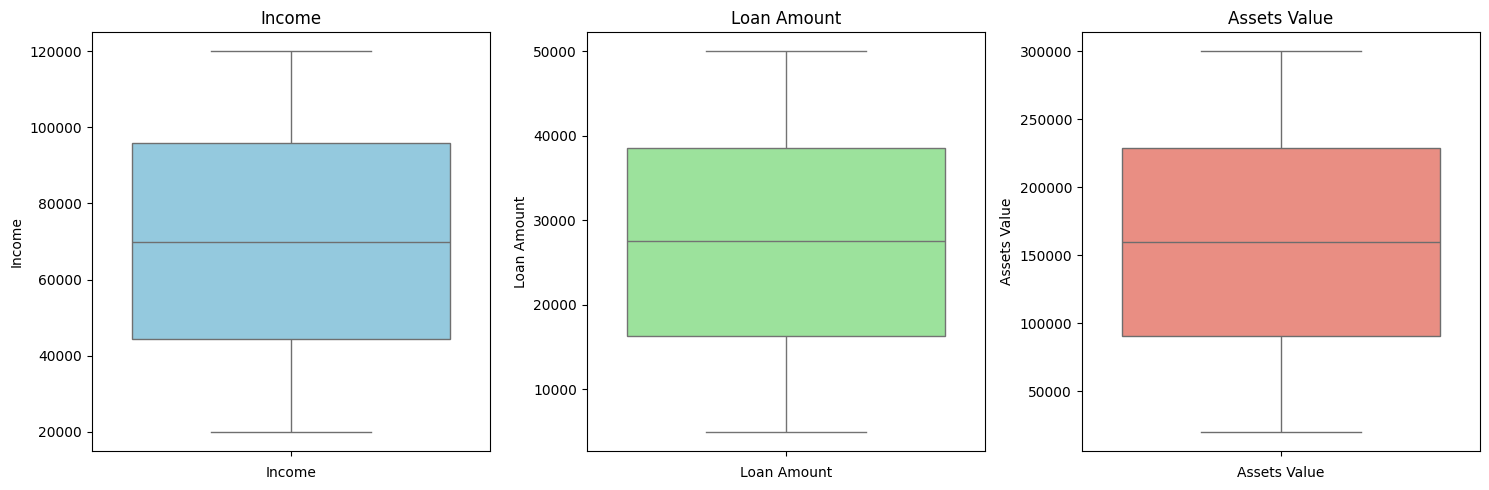

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(df_org['Income'], color='skyblue')
plt.title('Income')
plt.xlabel('Income')

plt.subplot(1,3,2)
sns.boxplot(df_org['Loan Amount'], color='lightgreen')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')

plt.subplot(1,3,3)
sns.boxplot(df_org['Assets Value'], color='salmon')
plt.title('Assets Value')
plt.xlabel('Assets Value')

plt.tight_layout()
plt.show()

In [18]:
df_org[df_org['Education Level'] == 'High School'].describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,3774.00,3221.00,3200.00,3168.00,3774.00,3774.00,3221.00,3210.00,3193.00,3774.00
mean,43.53,69718.62,697.65,27299.83,9.59,0.35,160591.36,2.03,2.01,1.00
std,15.05,29407.03,56.93,12996.56,5.75,0.14,79273.98,1.40,1.41,0.81
min,18.00,20048.00,600.00,5000.00,0.00,0.10,20125.00,0.00,0.00,0.00
25%,31.00,43268.00,649.00,16056.25,5.00,0.23,93455.00,1.00,1.00,0.00
50%,43.00,69777.00,697.00,27515.00,9.00,0.36,159661.00,2.00,2.00,1.00
75%,57.00,96064.00,746.00,38568.25,15.00,0.48,229217.00,3.00,3.00,2.00
max,69.00,119987.00,799.00,49953.00,19.00,0.60,299999.00,4.00,4.00,2.00


<Axes: ylabel='Age'>

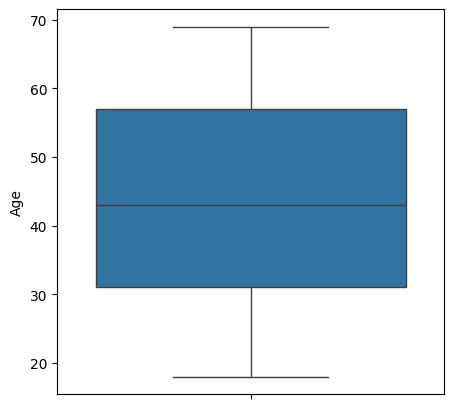

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot((df_org[df_org['Education Level'] == 'High School'])['Age'])

In [20]:
df1 = df_org.copy()
df1

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00,609.00,26187.00,Home,Self-employed,2,Fair,0.32,NaN,4.00,Susanstad,TN,Djibouti,2.00,0,Low
14996,56,Male,PhD,Single,107193.00,700.00,35111.00,Auto,Self-employed,10,Fair,0.16,79102.00,NaN,Port Heather,WA,Congo,0.00,0,Medium
14997,29,Non-binary,PhD,Married,46250.00,642.00,44369.00,Home,Unemployed,19,Excellent,0.59,196930.00,4.00,South Morganchester,LA,Palau,2.00,1,High
14998,53,Non-binary,PhD,Divorced,40180.00,638.00,32752.00,Home,Self-employed,12,Excellent,0.48,276060.00,NaN,Port Wayne,AK,Rwanda,0.00,2,High


In [21]:
df1['Age Group'] = ageGroup
df1

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Age Group
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low,2
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium,3
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium,1
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium,3
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00,609.00,26187.00,Home,Self-employed,2,Fair,0.32,NaN,4.00,Susanstad,TN,Djibouti,2.00,0,Low,1
14996,56,Male,PhD,Single,107193.00,700.00,35111.00,Auto,Self-employed,10,Fair,0.16,79102.00,NaN,Port Heather,WA,Congo,0.00,0,Medium,3
14997,29,Non-binary,PhD,Married,46250.00,642.00,44369.00,Home,Unemployed,19,Excellent,0.59,196930.00,4.00,South Morganchester,LA,Palau,2.00,1,High,1
14998,53,Non-binary,PhD,Divorced,40180.00,638.00,32752.00,Home,Self-employed,12,Excellent,0.48,276060.00,NaN,Port Wayne,AK,Rwanda,0.00,2,High,3


In [22]:
df1.groupby(by = 'Age Group').agg(
    Avg_Income = ('Income', 'mean'),
    Avg_CreditScore = ('Credit Score', 'mean')
)

,Avg_Income,Avg_CreditScore
Age Group,,
1,69613.36,698.95
2,70318.26,699.07
3,69730.01,699.25


In [23]:
risk_num = []
for i in df1['Risk Rating']:
    if i == 'Low':
        risk_num.append(1)
    elif i == 'Medium':
        risk_num.append(2)
    else:
        risk_num.append(3)

In [24]:
risk_num
df1['Risk Class'] = risk_num
df1


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Age Group,Risk Class
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low,2,1
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium,3,2
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium,1,2
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium,3,2
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00,609.00,26187.00,Home,Self-employed,2,Fair,0.32,NaN,4.00,Susanstad,TN,Djibouti,2.00,0,Low,1,1
14996,56,Male,PhD,Single,107193.00,700.00,35111.00,Auto,Self-employed,10,Fair,0.16,79102.00,NaN,Port Heather,WA,Congo,0.00,0,Medium,3,2
14997,29,Non-binary,PhD,Married,46250.00,642.00,44369.00,Home,Unemployed,19,Excellent,0.59,196930.00,4.00,South Morganchester,LA,Palau,2.00,1,High,1,3
14998,53,Non-binary,PhD,Divorced,40180.00,638.00,32752.00,Home,Self-employed,12,Excellent,0.48,276060.00,NaN,Port Wayne,AK,Rwanda,0.00,2,High,3,3


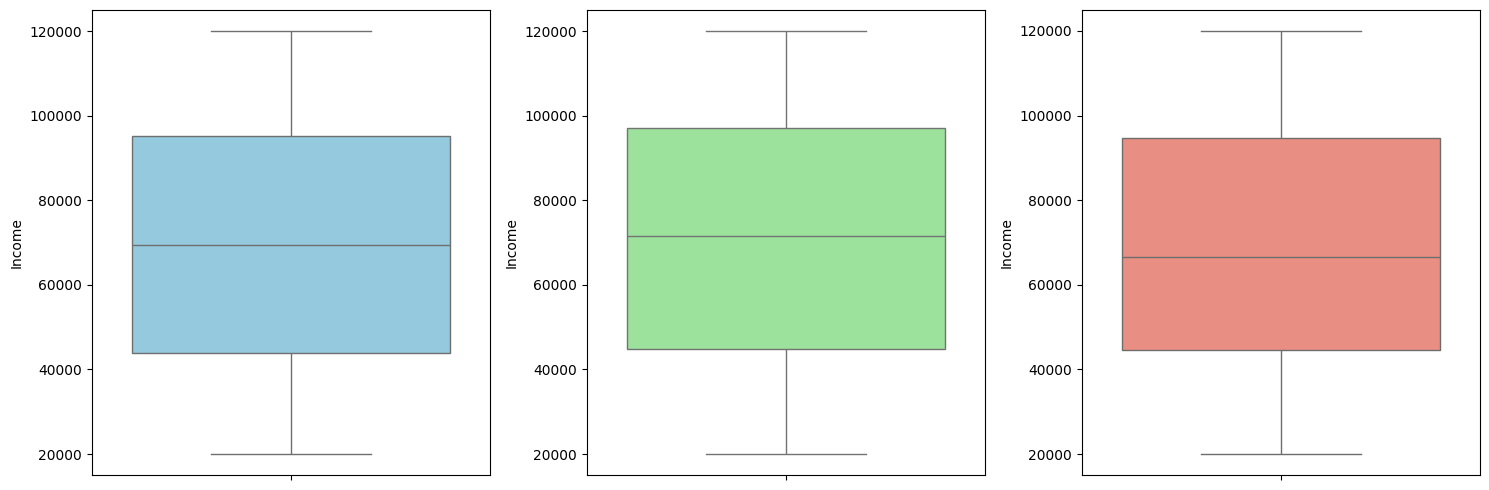

In [25]:
# income ouitlier distribution for high box plot 
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(df1[df1['Risk Rating'] == 'Low']['Income'], color='skyblue')

plt.subplot(1,3,2)
sns.boxplot(df1[df1['Risk Rating'] == 'Medium']['Income'], color='lightgreen')

plt.subplot(1,3,3)
sns.boxplot(df1[df1['Risk Rating'] == 'High']['Income'], color='salmon')

plt.tight_layout()
plt.show()

<Axes: >

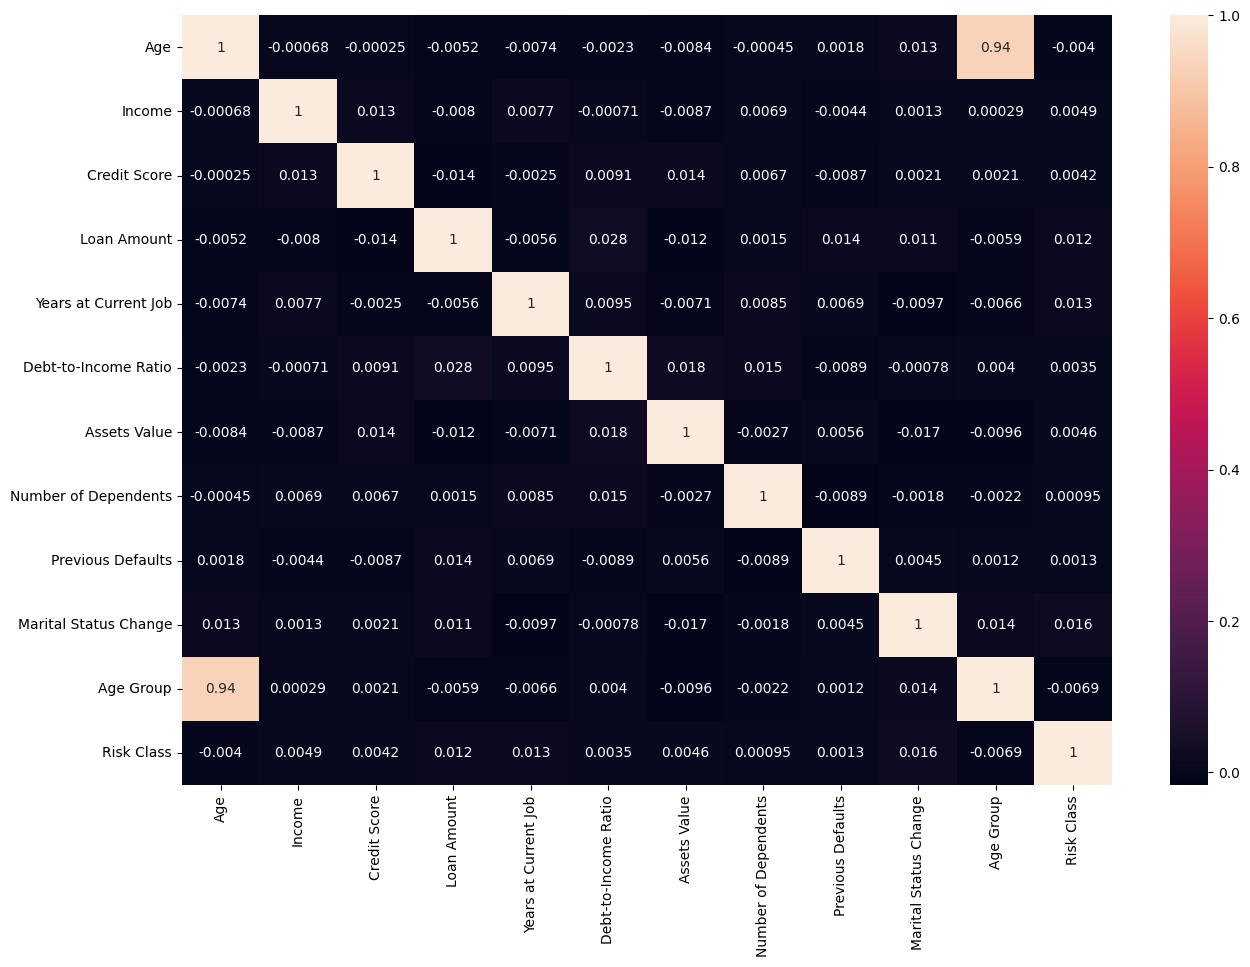

In [26]:
corr = df1.select_dtypes(include='number').corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [27]:
print('Hello World!!')

Hello World!!


<Axes: ylabel='Income'>

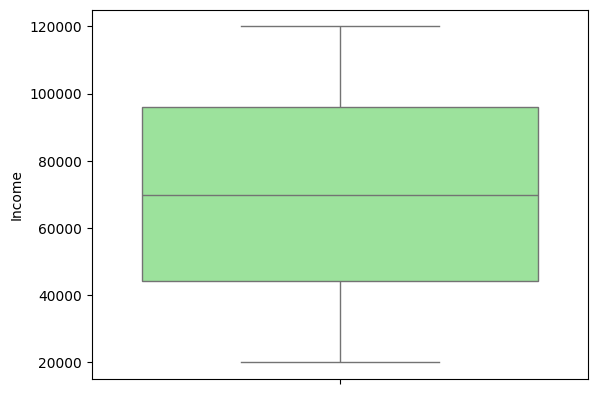

In [28]:
sns.boxplot(df_org['Income'], color='lightgreen')

In [29]:
df_org[(df_org['Employment Status'] == 'Unemployed') & (df_org['Risk Rating'] == 'High')]

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
62,54,Female,Bachelor's,Married,98669.00,720.00,19464.00,Business,Unemployed,2,Poor,0.17,26571.00,0.00,Smithview,IA,French Polynesia,1.00,0,High
180,31,Female,Master's,Widowed,108454.00,716.00,33552.00,Personal,Unemployed,8,Poor,0.59,24976.00,NaN,South Danielleview,VT,Chile,2.00,0,High
215,49,Non-binary,Bachelor's,Married,105916.00,750.00,6324.00,Personal,Unemployed,17,Poor,0.27,89195.00,2.00,New Phillip,SD,Peru,1.00,1,High
243,42,Female,Bachelor's,Widowed,47774.00,NaN,NaN,Auto,Unemployed,0,Excellent,0.51,275648.00,NaN,South Vanessaville,KY,Montserrat,1.00,2,High
293,25,Non-binary,Bachelor's,Married,95630.00,NaN,47368.00,Personal,Unemployed,17,Fair,0.47,187156.00,NaN,South Timothybury,PR,Ethiopia,1.00,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,45,Male,PhD,Divorced,NaN,705.00,47043.00,Personal,Unemployed,19,Good,0.49,108388.00,4.00,Millerborough,MA,Ghana,1.00,1,High
14947,45,Female,Master's,Single,98961.00,651.00,31069.00,Home,Unemployed,9,Excellent,0.35,99094.00,1.00,Weaverberg,MS,San Marino,4.00,2,High
14953,41,Female,PhD,Married,101795.00,NaN,38959.00,Home,Unemployed,9,Poor,0.42,NaN,0.00,South Kyle,CO,Dominican Republic,3.00,0,High
14976,46,Male,Bachelor's,Single,NaN,NaN,NaN,Auto,Unemployed,0,Excellent,0.13,67633.00,1.00,Chavezberg,MT,Northern Mariana Islands,1.00,2,High


In [30]:
df_org[df_org['Risk Rating'] == 'Low']['Risk Rating'].count()

np.int64(9000)

In [31]:
df_org[df_org['Risk Rating'] == 'Medium']['Risk Rating'].count()

np.int64(4500)

In [32]:
df_org[df_org['Risk Rating'] == 'High']['Risk Rating'].count()

np.int64(1500)

In [33]:
df_org

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.00,688.00,45713.00,Business,Unemployed,19,Poor,0.15,120228.00,0.00,Port Elizabeth,AS,Cyprus,2.00,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.00,33835.00,Auto,Employed,6,Fair,0.15,55849.00,0.00,North Catherine,OH,Turkmenistan,3.00,2,Medium
2,21,Non-binary,Master's,Single,55687.00,600.00,36623.00,Home,Employed,8,Fair,0.36,180700.00,3.00,South Scott,OK,Luxembourg,3.00,2,Medium
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.00,766.00,36528.00,Personal,Unemployed,10,Fair,0.14,287140.00,NaN,New Heather,IL,Namibia,3.00,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.00,609.00,26187.00,Home,Self-employed,2,Fair,0.32,NaN,4.00,Susanstad,TN,Djibouti,2.00,0,Low
14996,56,Male,PhD,Single,107193.00,700.00,35111.00,Auto,Self-employed,10,Fair,0.16,79102.00,NaN,Port Heather,WA,Congo,0.00,0,Medium
14997,29,Non-binary,PhD,Married,46250.00,642.00,44369.00,Home,Unemployed,19,Excellent,0.59,196930.00,4.00,South Morganchester,LA,Palau,2.00,1,High
14998,53,Non-binary,PhD,Divorced,40180.00,638.00,32752.00,Home,Self-employed,12,Excellent,0.48,276060.00,NaN,Port Wayne,AK,Rwanda,0.00,2,High


In [34]:
df_org[(df_org['Income'] < df_org['Loan Amount'])]

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
3,59,Male,Bachelor's,Single,26508.00,622.00,26541.00,Personal,Unemployed,2,Excellent,0.45,157319.00,3.00,Robinhaven,PR,Uganda,4.00,2,Medium
19,56,Non-binary,PhD,Married,21084.00,702.00,22039.00,Personal,Employed,19,Fair,0.23,226053.00,2.00,East James,MP,Isle of Man,0.00,2,Medium
32,48,Non-binary,PhD,Married,46408.00,632.00,48403.00,Personal,Unemployed,16,Excellent,0.19,93647.00,3.00,South Jason,KS,Guyana,1.00,0,Low
98,19,Male,High School,Married,35817.00,731.00,44426.00,Home,Unemployed,1,Fair,0.51,20626.00,1.00,East Triciatown,WI,Angola,0.00,2,Low
107,58,Non-binary,High School,Widowed,20947.00,776.00,38756.00,Personal,Unemployed,0,Good,0.22,91848.00,4.00,North Jeff,MT,Burundi,NaN,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,54,Non-binary,Bachelor's,Single,37996.00,656.00,42776.00,Auto,Self-employed,8,Poor,0.47,NaN,0.00,East Kellybury,IL,Angola,1.00,1,Low
14952,50,Female,Bachelor's,Widowed,22781.00,695.00,49891.00,Auto,Unemployed,5,Good,0.50,215151.00,4.00,Stephanieton,GA,Saint Vincent and the Grenadines,1.00,2,Medium
14957,29,Female,Bachelor's,Married,23659.00,NaN,38745.00,Personal,Employed,10,Excellent,0.48,193254.00,4.00,Farleyburgh,LA,Andorra,2.00,1,Low
14974,66,Female,PhD,Married,28360.00,NaN,48088.00,Home,Self-employed,16,Good,0.39,160465.00,NaN,Port Thomasville,MN,Slovakia (Slovak Republic),4.00,2,High
